In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\adarsh\\Downloads\\Expander_data.csv")
df.shape

(296450, 9)

In [3]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()
#there is no missing value

In [ ]:
df.dtypes
#timestamp needs to changed

In [4]:
data=df.drop(['Timestamp','Run Status'],axis=1)

In [6]:
data.dtypes

Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
dtype: object

In [7]:
#seperating independent and dependent variables
x = data.drop(['Suction Pressure (psig)'], axis=1)
y = data['Discharge Pressure (psig)']
x.shape, y.shape

((296450, 6), (296450,))

In [8]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [9]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [10]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     6.335203212132576e-14


In [12]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     6.339422156060645e-14


In [14]:
lr.coef_

array([-3.61923150e-14, -2.41719424e-16, -3.10148319e-16,  1.46466287e-16,
        1.00000000e+00, -1.44515037e-14])

Text(0.5, 1.0, 'Coefficient plot')

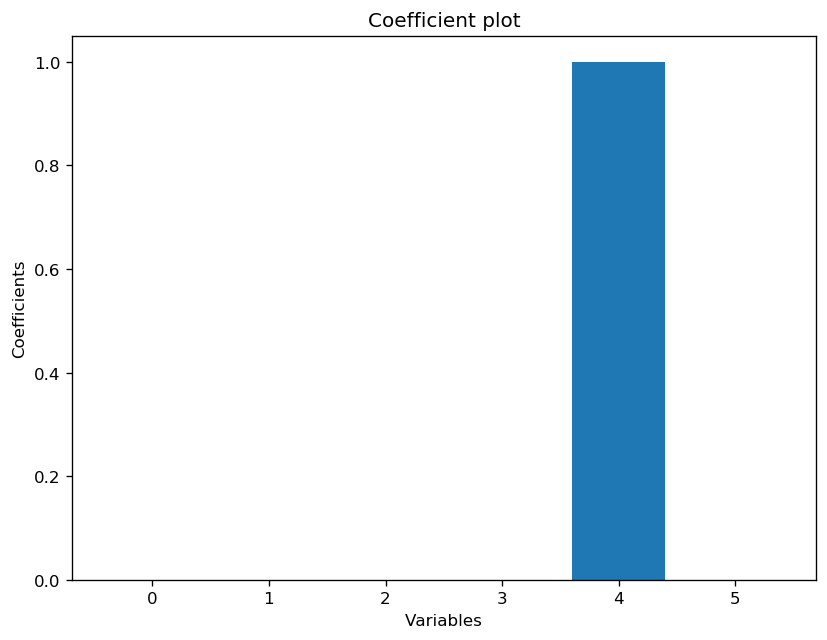

In [15]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [16]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
63140,95.638173,95.638173,-1.847411e-13
130313,237.900676,237.900676,2.842171e-14
222693,133.771442,133.771442,0.000000e+00
166133,192.819575,192.819575,5.684342e-14
139602,230.317140,230.317140,5.684342e-14


##plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,25000)
k = [0 for i in range(0,25000)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

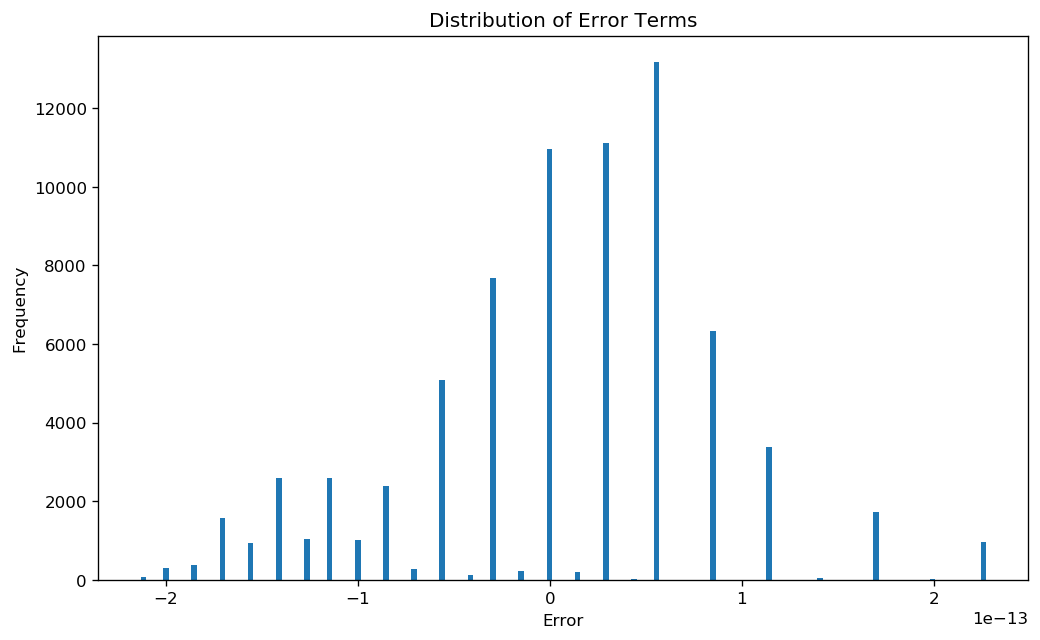

In [20]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

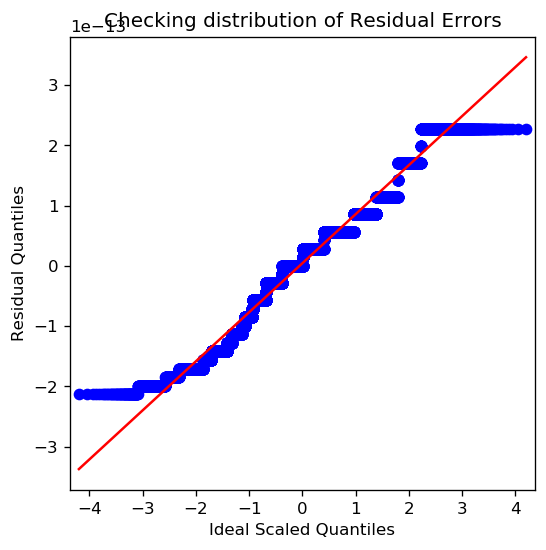

In [24]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [25]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 3.9912689758748645e-14


In [27]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.006412947273984e-14


Text(0.5, 1.0, 'Normalized Coefficient plot')

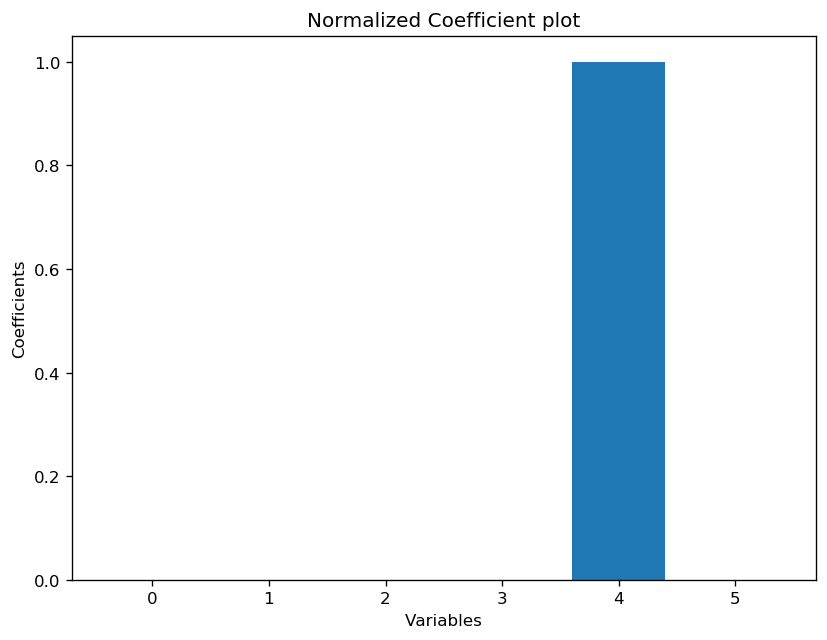

In [28]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [35]:
lr.coef_

array([-2.91042736e-14,  7.26837253e-17, -5.64527304e-16, -1.10793763e-15,
        1.00000000e+00, -8.74580857e-15])